In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [30]:
alphap = 3

ylims = dict()
ylims[2] = [0, 5.5]
ylims[3] = [0.5, 3.5]

## Directory

In [31]:
dir_data = "../../data/alpha{}/".format(alphap)
dir_fig  = "../../figure/alpha{}/".format(alphap)

fig_filename = dir_fig + "fractal_dim_alpha_{}.pdf".format(alphap)

In [32]:
import glob
files = glob.glob(dir_data+"fractal_dim_alpha_{}*".format(alphap))

In [33]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    slope, intercept = np.polyfit(minus_delta1_log, N1_log, 1)
    return minus_delta1_log, N1_log, slope, intercept

In [34]:
# data_dct = dict()
# for file in files:
#     i = int(file[-4:-1])
#     data = np.loadtxt(file)
#     data_dct[i] = data
#     x,y = data.T
#     print(data_dct[i][0:])

In [35]:
# signature = 'data_collapse_alpha_2_t_{}k'
# for i in range(3):
#     time_t = min_iterationp*(i+1)
#     x,y = data_dict[time_t]
#     file_name = signature.format(int(time_t//1000))
#     np.savetxt(file_name,np.c_[x,y])

../../figure/alpha3/fractal_dim_alpha_3.pdf


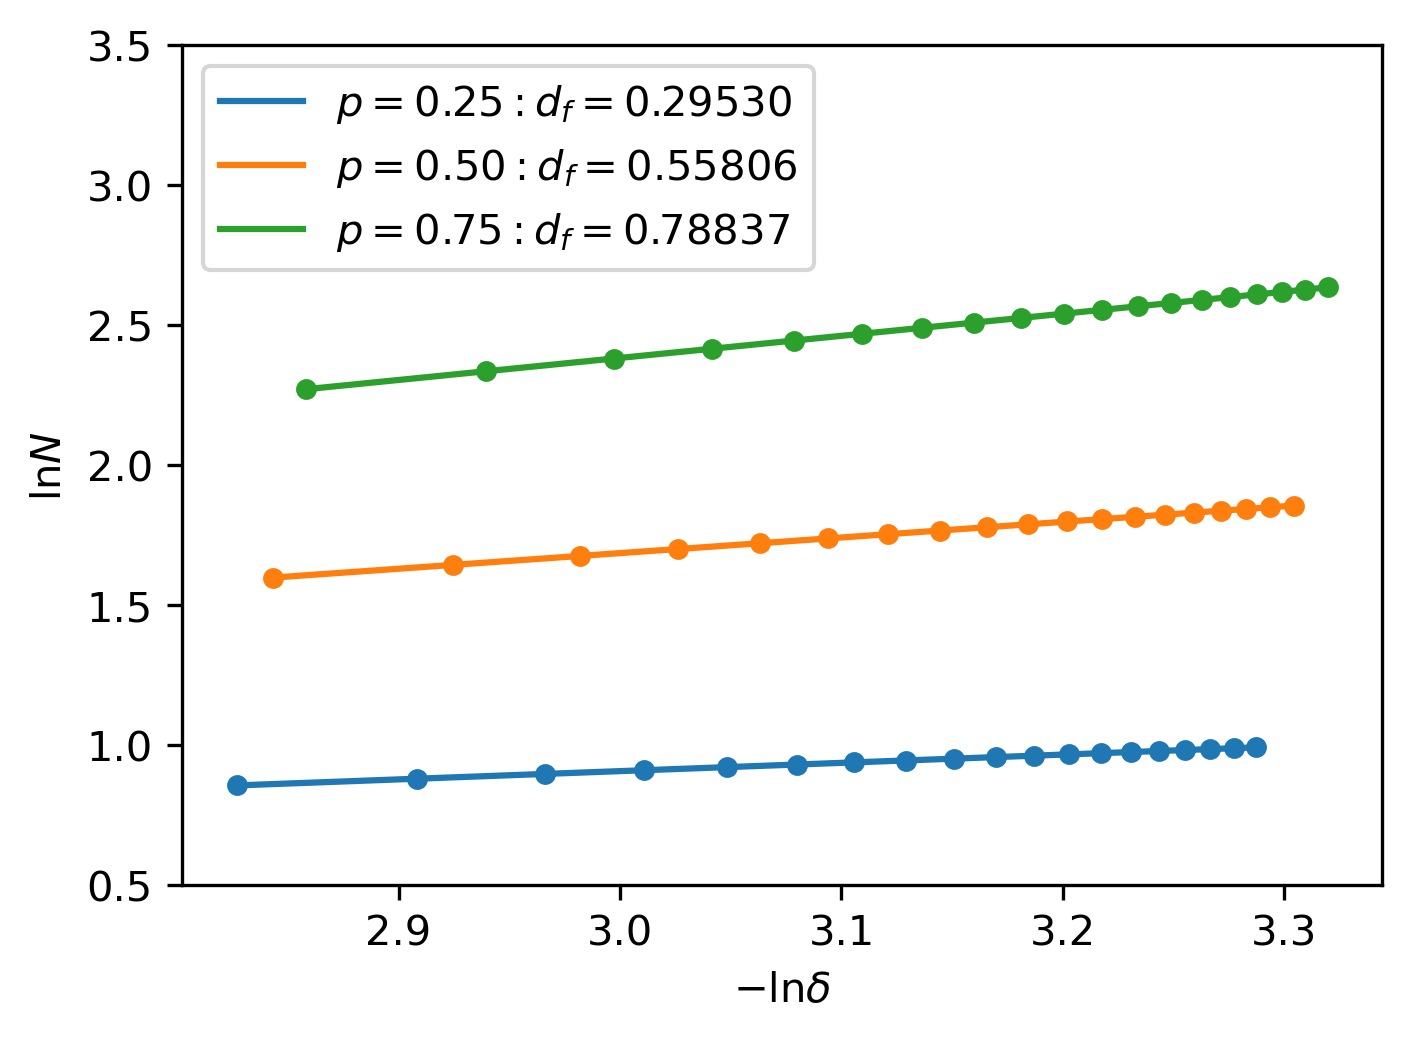

In [36]:
fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)
percent_p = [25, 50, 75]
colors = ['tab:blue', 'tab:orange', 'tab:green']

k=0
for i in percent_p:
    for j in files:
        if int(j[-2:]) == int(i):
            filename = j
    data = np.loadtxt(filename)
    t, N, M = data.T
    x, y, slope, intercept = convert_to_plot(N, M)
    p = i/100
    plt.plot(x, y,"o", markersize=4, color=colors[k])
    plt.plot(x, x*slope + intercept, label=r"$p={:.2f}: d_f={:.5f}$".format(p, slope), color=colors[k])
    k += 1

plt.legend(loc=2)
plt.xlabel(r"$-\ln \delta$")
plt.ylabel(r"$\ln N$")
plt.ylim(ylims[alphap])
axes.set_position([0.15, 0.15, 0.8, 0.8])
print(fig_filename)
plt.savefig(fig_filename)